In [254]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [255]:
df = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = df[:, :2]
y = df[:, 2:].flatten()
X[:3], y[:3]

(array([[2104.,    3.],
        [1600.,    3.],
        [2400.,    3.]]),
 array([399900., 329900., 369000.]))

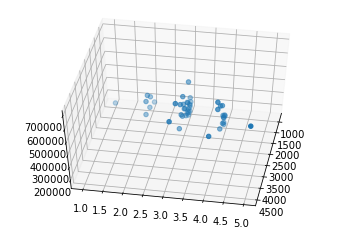

In [256]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], y, cmap='viridis')
ax.view_init(50, 10)

In [257]:
def get_X_with_additional_dim(X):
    return np.c_[np.ones(X.shape[0]), X]

In [258]:
def normalization_func(X):
    return (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [259]:
X_new = get_X_with_additional_dim(normalization_func(X))
X_new.shape

(47, 3)

In [260]:
thetas = np.ones(X_new.shape[1])
thetas

array([1., 1., 1.])

In [261]:
def linear_func(theta, X):
    return np.dot(X, theta)

In [262]:
def func_optimize(theta, X, y):
    var1 = 1 / X.shape[0]
    J_theta = linear_func(theta, X)
    J_theta_minus_y = J_theta - y
    J_theta_minus_y_mul_X = np.dot(J_theta_minus_y, X)
    
    return var1 * J_theta_minus_y_mul_X

In [263]:
def calculate_theta(theta, X, y, learning_rate=0.01):
    return theta - learning_rate * func_optimize(theta, X, y)

In [270]:
thetas_prev = thetas
learning_rate = 0.0001
for i in range(1000000):
    thetas = calculate_theta(thetas, X_new, y, learning_rate)
    
    
    
    theta_prev = thetas

thetas

array([340412.65957418, 504747.37996329, -34912.84612625])

# Normal Equation

In [265]:
np.dot(np.dot(np.linalg.inv(np.dot(X_new.T, X_new)), X_new.T), y).T

array([340412.65957447, 504777.90398791, -34952.07644931])